<a href="https://colab.research.google.com/github/YenLinWu/Daily_Work_of_Data_Science/blob/Dev/MAAPE_and_MAPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前言

有關機器學習迴歸模型的評估，平均絕對百分比誤差(Mean Absolute Percentage Error, MAPE)是一種常用的指標，因為，MAPE 易於理解和解釋，且可對不同模型進行比較，然而，當實際值為 $0$ 或非常接近 $0$ 時，MAPE 會有無法計算或無限大的問題，限制了 MAPE 在某些特殊情境中的應用。

當資料集中存在間歇性或少量的實際值為 $0$ 時，為了克服 MAPE 的問題，我們可選擇另一個評估指標 : <font color="#FFFF00">**平均反正切絕對百分比誤差**</font>(Mean Arctangent Absolute Percentage Error, <font color="#FFFF00">**MAAPE**</font>)，MAAPE 係將誤差視為角度而非比例，提供一個從 $0$ 到 $\pi/2$ 的有界度量範圍，為一個有效替代 MAPE 的指標。  


# 平均絕對百分比誤差 MAPE  

* 平均絕對百分比誤差 MAPE     
  
  * 數學定義 :    
  \begin{aligned}
  \displaystyle \text{MAPE} &\equiv \frac{1}{N} \sum_{i=1}^{N} \text{Absolute Percentage Error, APE}\\
   &= \frac{1}{N} \sum_{i=1}^{N} \Bigg\lvert \frac{A_i-F_i}{A_i} \Bigg\rvert \in [0, \infty),
  \end{aligned}    
  其中，$A_i$ 為實際值，$F_i$ 為模型的預測值。  
  </br>   
  * <font color="#FFFF00">MAPE 係一個與尺度無關的度量指標</font>，換句話說，數據的尺度不會影響 MAPE 的計算結果，使得 MAPE 適合比較不同數據尺度的模型表現，例如 : 我們可使用同一個迴歸模型，來預測店家中不同產品的銷售量，或者，在房價的預測中，使用同一個迴歸模型，預測不同地區的房價。  
  </br>  
  * <font color="#FFFF00">當實際值為零或非常接近零時，MAPE 會發生無法計算或結果超過 100% 的問題。</font></br>
  下列左二維圖中，$x$ 軸表示實際值，$y$ 軸表示預測值，此圖表示在各種實際值與預測值情況下的 APE ，可發現左上角的 APE 遠大於其他區域的 APE，更進一步，觀察下左二維圖對角線上的 APE，如下列右圖，可發現即便是相同誤差量，但是，實際值越小 APE 越大。因此，從下列兩張圖可說明 MAPE 的問題，當實際值非常接近零時，會導致 APE 變得極大，也就是說，當實際值很小的狀況， MAPE 會成為一個沒有上限的評估指標，無法評估迴歸模型的預測表現。
    <p>
    <img width="350" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/MAAPE_and_MAPE/imgs/Visualization_of_APE.jpg">
    <img width="325" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/MAAPE_and_MAPE/imgs/APE_values_on_the_diagonal_line.jpg">
    </p>

    🔗 資料來源 : Sungil Kim, Heeyoung Kim, A new metric of absolute percentage error for intermittent demand forecasts, Volume 32, Issue 3, 2016, Pages 669-679, ISSN 0169-2070, [https://doi.org/10.1016/j.ijforecast.2015.12.003](https://www.sciencedirect.com/science/article/pii/S0169207016000121).

  </br>


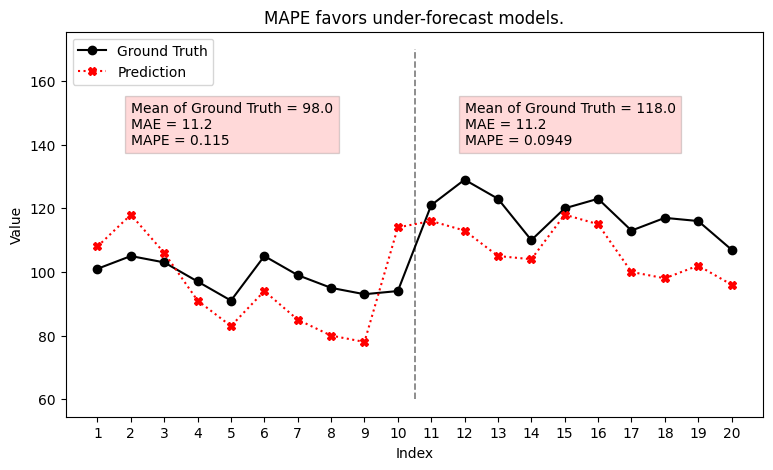

In [1]:
#@markdown * MAPE 不具對稱性，MAPE 對高估誤差的懲罰較重，對低估誤差相對寬容。
#@markdown </br>由於 MAPE 係預測誤差相對於實際值的百分比，因此，當實際值小於預測值時，高估所帶來的百分比誤差會顯得非常大，相反地，低估時的誤差百分比則相對較小。
#@markdown 在 ML 模型訓練完成布署上線後，如果實際數據發生資料飄移(Data Drift)，整體實際數據往上提升的情況，則，MAPE 會變小且偏袒此時模型低估的現象，如下圖所示，容易導致在檢視模型表現時的錯覺。

########## Import library ##########
import sys
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error

# print('Python version:', sys.version[0:7])
# print('NumPy version:', np.__version__)
# print('Matplotlib version:', mpl.__version__)
# print('Scikit-Learn version:', sklearn.__version__)

########## Define functions ##########
def mean_absolute_percentage_error(y_true=None, y_pred=None):
    '''
    計算平均絕對百分比誤差

    params:
        y_true (np.array, pd.series): 實際值
        y_pred (np.array, pd.series): 預測值

    return:
        mape (float): 平均絕對百分比誤差
    '''

    if (isinstance(y_true, list) and isinstance(y_pred, list)):
        raise TypeError('變數型態須為 NumPy Array 或 Pandas Series')

    y_true = np.array(y_true)
    if np.any(y_true==0):
        epsilon = np.finfo(np.float64).eps
        mape = np.mean(np.abs(y_true-y_pred)/np.maximum(np.abs(y_true), epsilon), axis=0)

    else:
        mape = np.mean(np.abs((y_true-y_pred)/y_true), axis=0)

    return mape

########## MAPE favors under forecast models ##########
y_true = np.array([101, 105, 103, 97, 91, 105, 99, 95, 93, 94,
                   121, 129, 123, 110, 120, 123, 113, 117, 116, 107])
y_pred = np.array([108, 118, 106, 91, 83, 94, 85, 80, 78, 114,
                   116, 113, 105, 104, 118, 115, 100, 98, 102, 96])
mean_1 = np.mean(y_true[:10])
mean_2 = np.mean(y_true[-10:])
mae_1 = mean_absolute_error(y_true[:10], y_pred[:10])
mae_2 = mean_absolute_error(y_true[-10:], y_pred[-10:])
mape_1 = mean_absolute_percentage_error(y_true[:10], y_pred[:10])
mape_2 = mean_absolute_percentage_error(y_true[-10:], y_pred[-10:])

plt.figure(figsize=(9, 5))
plt.vlines(x=10.5, ymin=60, ymax=170,
           linestyles='--', color='gray', linewidth=1.25)
plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1))
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('MAPE favors under-forecast models.')

text_1 = 'Mean of Ground Truth = '+str(np.round(mean_1, 0))+'\nMAE = '+str(np.round(mae_1, 1))+'\nMAPE = '+str(np.round(mape_1, 4))
text_2 = 'Mean of Ground Truth = '+str(np.round(mean_2, 0))+'\nMAE = '+str(np.round(mae_2, 1))+'\nMAPE = '+str(np.round(mape_2, 4))
plt.text(2, 140, text_1, bbox=dict(facecolor='red', alpha=0.15))
plt.text(12, 140, text_2, bbox=dict(facecolor='red', alpha=0.15))

img_path = 'MAPE_Favors_Under_Forecast_Models.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

# 平均反正切絕對百分比誤差 MAAPE

* 平均反正切絕對百分比誤差 MAAPE

  * 數學定義 :     
  \begin{aligned}
  \displaystyle \text{MAAPE} &\equiv \frac{1}{N} \sum_{i=1}^{N} \text{Arctangent Absolute Percentage Error, AAPE}\\
  &= \frac{1}{N} \sum_{i=1}^{N} \arctan\Big( \Bigg\lvert \frac{A_i-F_i}{A_i} \Bigg\rvert \Big) \in [0, \pi/2],
  \end{aligned}    
  其中，$A_i$ 為實際值，$F_i$ 為模型的預測值。  
  </br>
  * MAAPE 保持了 MAPE 的基本思維，且更進一步將誤差視為角度而非斜率，以避免因實際值為零或非常接近零，導致計算結果的無上限。下圖為 AAPE 的概念說明，藉由反正切函數([arctangent](https://zh.wikipedia.org/zh-tw/%E5%8F%8D%E6%AD%A3%E5%88%87))，將誤差大小從斜率轉換成角度的概念，數學公式如下
  $$\theta = \arctan(\big\lvert \frac{A-F}{A} \big\rvert) \text{。}$$  
  <p align="center">
  <img width="350" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/MAAPE_and_MAPE/imgs/Concept_of_AAPE.jpg">
  </p>  

    🔗 資料來源 : Sungil Kim, Heeyoung Kim, A new metric of absolute percentage error for intermittent demand forecasts, Volume 32, Issue 3, 2016, Pages 669-679, ISSN 0169-2070, [https://doi.org/10.1016/j.ijforecast.2015.12.003](https://www.sciencedirect.com/science/article/pii/S0169207016000121).
  </br>
  * <font color="#FFFF00">當實際值非常接近零時，MAAPE 不會發生無上限的情況</font>，能保持在有限的數值範圍內，較 MAPE 來得穩健。

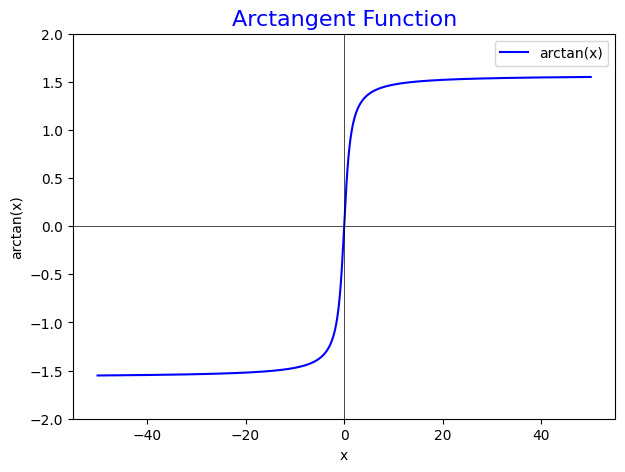

In [2]:
#@markdown 備註 : 反正切函數(Arctangent Function)

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-50, 50, 1000)
y = np.arctan(x)

plt.figure(figsize=(7, 5))
plt.plot(x, y, label='arctan(x)', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.ylim([-2, 2])
plt.xlabel('x')
plt.ylabel('arctan(x)')
plt.title('Arctangent Function', fontsize=16, color='blue')

plt.show()

# MAPE 與 MAAPE 的關聯性   

在選擇評估指標時，我們須要根據具體的應用場景與需求，決定使用哪一個指標最為適用且適當，下列將說明 MAPE 與 MAPPE 兩者的關聯性，與其適合應用的需求情境。

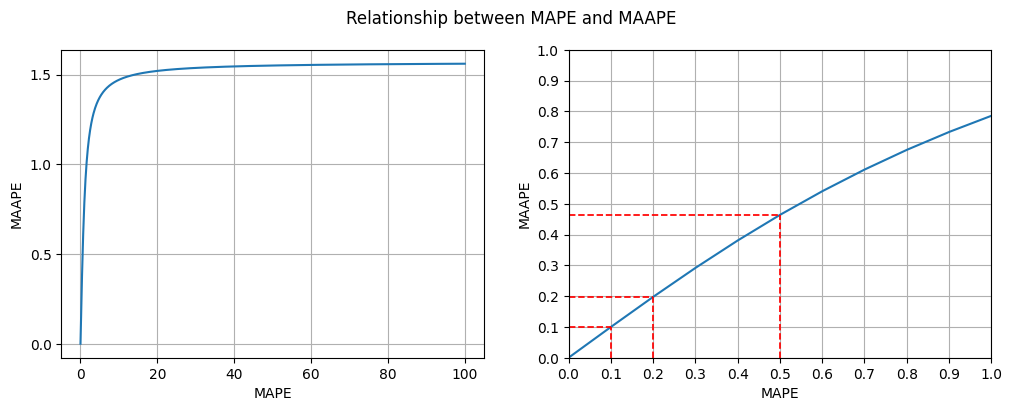

In [3]:
#@markdown 下圖為 MAPE 與 MAAPE 的約略關係圖，直觀概念有下列兩點 :
#@markdown * 直觀來說，<font color="#FFFF00">MAAPE 較 MAPE **小**</font>。
#@markdown * 直觀來說，當絕對百分比誤差 APE 小於 0.3 時，AAPE 與 APE 的數值非常地相近，因此，<font color="#FFFF00">當 MAAPE 小於 0.3 時，其可直觀地採用 MAPE 的概念做解釋。</font>

# Import library
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# print('Python version:', sys.version[0:7])
# print('NumPy version:', np.__version__)
# print('Matplotlib version:', mpl.__version__)

# Generate a range of MAPE values
mape_values = np.linspace(0, 100, 1000)

# Compute the corresponding MAAPE values using arctan function
maape_values = np.arctan(mape_values)

# Plot the relationship
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(mape_values, maape_values)
plt.xlabel('MAPE')
plt.ylabel('MAAPE')
plt.xticks(np.arange(0, 120, 20))
plt.yticks(np.arange(0, 2, 0.5))
plt.grid(True)

plt.subplot(122)
plt.plot(mape_values, maape_values)
for i in [0.1, 0.2, 0.5]:
    plt.vlines(x=i, ymin=0, ymax=np.arctan(i),
               linestyles='--', color='red', linewidth=1.25)
    plt.hlines(y=np.arctan(i), xmin=0, xmax=i,
               linestyles='--', color='red', linewidth=1.25)
plt.xlabel('MAPE')
plt.ylabel('MAAPE')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)

plt.suptitle('Relationship between MAPE and MAAPE', fontsize=12)

img_path = 'Relationship_between_MAPE_and_MAAPE.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

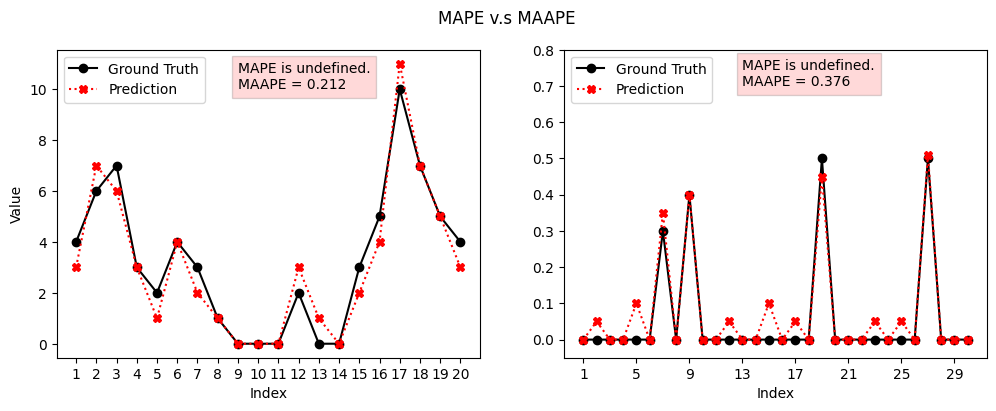

In [4]:
#@markdown 當資料集中目標變數 $y$ 有部分少數的實際值為 0 時，從 MAPE 的數學定義中，會無法計算出數值，如下面兩圖所示。
#@markdown
#@markdown 在下面左圖範例中，我們可直觀地觀察到預測值與實際值，不論其數值大小或趨勢，兩者十分的相近，然而，因為有部分的實際值為 0，導致無法藉由 MAPE 評估預測表現，但能透過 MAAPE 來評估預測表現。
#@markdown
#@markdown 另一方面，在下面右圖範例中，雖然，MAAPE 能克服當實際值為 0 的狀況，但是，<font color="#FFFF00">若資料集中的目標變數 $y$ 含有**大量的實際值 0** 時，MAAPE 並**非**為一個合適的評估指標</font>，因為，在這種情況下，MAAPE 會過度平滑誤差，導致容易掩蓋預測誤差的真實程度。

########## Import library ##########
import sys
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error

# print('Python version:', sys.version[0:7])
# print('NumPy version:', np.__version__)
# print('Matplotlib version:', mpl.__version__)
# print('Scikit-Learn version:', sklearn.__version__)

########## Define functions ##########
def mean_absolute_percentage_error(y_true=None, y_pred=None):
    '''
    計算平均絕對百分比誤差

    params:
        y_true (np.array, pd.series): 實際值
        y_pred (np.array, pd.series): 預測值

    return:
        mape (float): 平均絕對百分比誤差
    '''

    if (isinstance(y_true, list) and isinstance(y_pred, list)):
        raise TypeError('變數型態須為 NumPy Array 或 Pandas Series')

    y_true = np.array(y_true)
    if np.any(y_true==0):
        epsilon = np.finfo(np.float64).eps
        mape = np.mean(np.abs(y_true-y_pred)/np.maximum(np.abs(y_true), epsilon), axis=0)

    else:
        mape = np.mean(np.abs((y_true-y_pred)/y_true), axis=0)

    return mape

def mean_arctangent_absolute_percentage_error(y_true=None, y_pred=None):
    '''
    計算平均反正切絕對百分比誤差

    params:
        y_true (np.array, pd.series): 實際值
        y_pred (np.array, pd.series): 預測值

    return:
        maape (float): 平均反正切絕對百分比誤差
    '''

    if isinstance(y_true, list) and isinstance(y_pred, list):
        raise TypeError('變數型態須為 NumPy Array 或 Pandas Series')

    y_true = np.array(y_true)
    if np.any(y_true==0):
        epsilon = np.finfo(np.float64).eps
        maape = np.mean(np.arctan(np.abs(y_true-y_pred)/np.maximum(np.abs(y_true), epsilon)))

    else:
        maape = np.mean(np.arctan(np.abs((y_true-y_pred)/y_true)))

    return maape

########## Examples ##########
plt.figure(figsize=(12, 4))
########## Example 1 ##########
plt.subplot(121)
y_true = np.array([4, 6, 7, 3, 2, 4, 3, 1, 0, 0,
                   0, 2, 0, 0, 3, 5, 10, 7, 5, 4])
y_pred = np.array([3, 7, 6, 3, 1, 4, 2, 1, 0, 0,
                   0, 3, 1, 0, 2, 4, 11, 7, 5, 3])

mape = mean_absolute_percentage_error(y_true, y_pred)
maape = mean_arctangent_absolute_percentage_error(y_true, y_pred)

plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1))
plt.xlabel('Index')
plt.ylabel('Value')

if np.any(y_true == 0):
    text = 'MAPE is undefined.'+'\nMAAPE = '+str(np.round(maape, 3))
else:
    text = 'MAPE = '+str(np.round(mape, 3))+'\nMAAPE = '+str(np.round(maape, 3))

plt.text(9, 10, text, bbox=dict(facecolor='red', alpha=0.15))

########## Example 2 ##########
plt.subplot(122)
y_true = np.array([0, 0, 0, 0, 0, 0, 0.3, 0, 0.4, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0,
                   0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0])
y_pred = np.array([0, 0.05, 0, 0, 0.1, 0, 0.35, 0, 0.4, 0,
                   0, 0.05, 0, 0, 0.1, 0, 0.05, 0, 0.45, 0,
                   0, 0, 0.05, 0, 0.05, 0, 0.51, 0, 0, 0])

mape = mean_absolute_percentage_error(y_true, y_pred)
maape = mean_arctangent_absolute_percentage_error(y_true, y_pred)

plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1, 4))
plt.xlabel('Index')
plt.ylim([-0.05, 0.8])

if np.any(y_true == 0):
    text = 'MAPE is undefined.'+'\nMAAPE = '+str(np.round(maape, 3))
else:
    text = 'MAPE = '+str(np.round(mape, 3))+'\nMAAPE = '+str(np.round(maape, 3))

plt.text(13, 0.7, text, bbox=dict(facecolor='red', alpha=0.15))

plt.suptitle('MAPE v.s MAAPE')

img_path = 'MAPE_and_MAAPE_with_Zero_Actual_Values.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

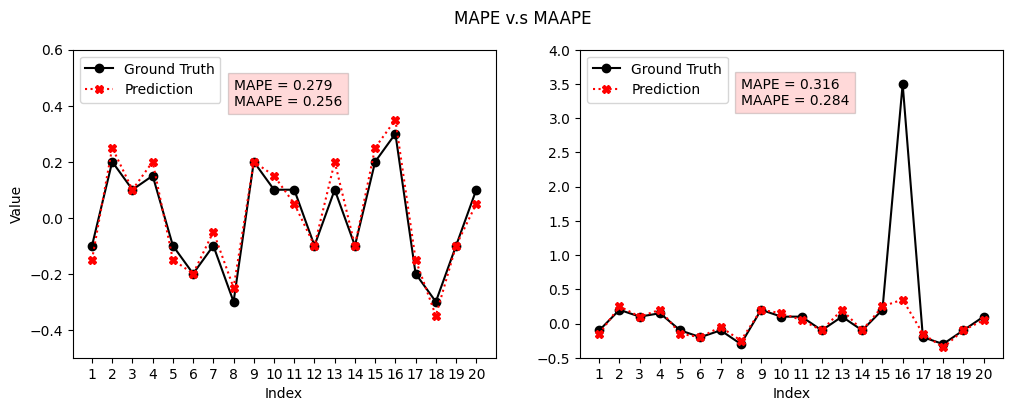

In [5]:
#@markdown <font color="#FFFF00">當資料集中存有異常值(或離群值)時，MAAPE 較 MAPE 更具穩健性。</font>
#@markdown
#@markdown 假設異常值(或離群值)的發生，係由於錯誤或不正確的紀錄或量測所致，因為，對於這些錯誤 MAAPE 較 MAPE 敏感度低，因此，建議可使用 MAAPE 作為模型的評估指標。
#@markdown
#@markdown 另一方面，如果異常值(或離群值)為業務範疇中合理且可解釋的情況，例如 : 蛋黃區的精華地段，房價通常會明顯高出許多，或者，異常值(或離群值)對於業務流程中有重要影響，例如 : 設備的震動訊號異常，有時代表設備零件須保養更換，在此種情況下，則不建議使用 MAAPE 作為評估指標。

plt.figure(figsize=(12, 4))
########## Example 1 ##########
plt.subplot(121)
y_true = np.array([-0.1, 0.2, 0.1, 0.15, -0.1, -0.2, -0.1, -0.3, 0.2, 0.1,
                   0.1, -0.1, 0.1, -0.1, 0.2, 0.3, -0.2, -0.3, -0.1, 0.1])
y_pred = np.array([-0.15, 0.25, 0.1, 0.2, -0.15, -0.2, -0.05, -0.25, 0.2, 0.15,
                   0.05, -0.1, 0.2, -0.1, 0.25, 0.35, -0.15, -0.35, -0.1, 0.05])

mape = mean_absolute_percentage_error(y_true, y_pred)
maape = mean_arctangent_absolute_percentage_error(y_true, y_pred)

plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1))
plt.ylim([-0.5, 0.6])
plt.xlabel('Index')
plt.ylabel('Value')

if np.any(y_true == 0):
    text = 'MAPE is undefined.'+'\nMAAPE = '+str(np.round(maape, 3))
else:
    text = 'MAPE = '+str(np.round(mape, 3))+'\nMAAPE = '+str(np.round(maape, 3))

plt.text(8, 0.4, text, bbox=dict(facecolor='red', alpha=0.15))

########## Example 2 ##########
plt.subplot(122)
y_true = np.array([-0.1, 0.2, 0.1, 0.15, -0.1, -0.2, -0.1, -0.3, 0.2, 0.1,
                   0.1, -0.1, 0.1, -0.1, 0.2, 3.5, -0.2, -0.3, -0.1, 0.1])
y_pred = np.array([-0.15, 0.25, 0.1, 0.2, -0.15, -0.2, -0.05, -0.25, 0.2, 0.15,
                   0.05, -0.1, 0.2, -0.1, 0.25, 0.35, -0.15, -0.35, -0.1, 0.05])

mape = mean_absolute_percentage_error(y_true, y_pred)
maape = mean_arctangent_absolute_percentage_error(y_true, y_pred)

plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1))
plt.ylim([-0.5, 4])
plt.xlabel('Index')

if np.any(y_true == 0):
    text = 'MAPE is undefined.'+'\nMAAPE = '+str(np.round(maape, 3))
else:
    text = 'MAPE = '+str(np.round(mape, 3))+'\nMAAPE = '+str(np.round(maape, 3))

plt.text(8, 3.2, text, bbox=dict(facecolor='red', alpha=0.15))

plt.suptitle('MAPE v.s MAAPE')

img_path = 'MAPE_and_MAAPE_with_outlier.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

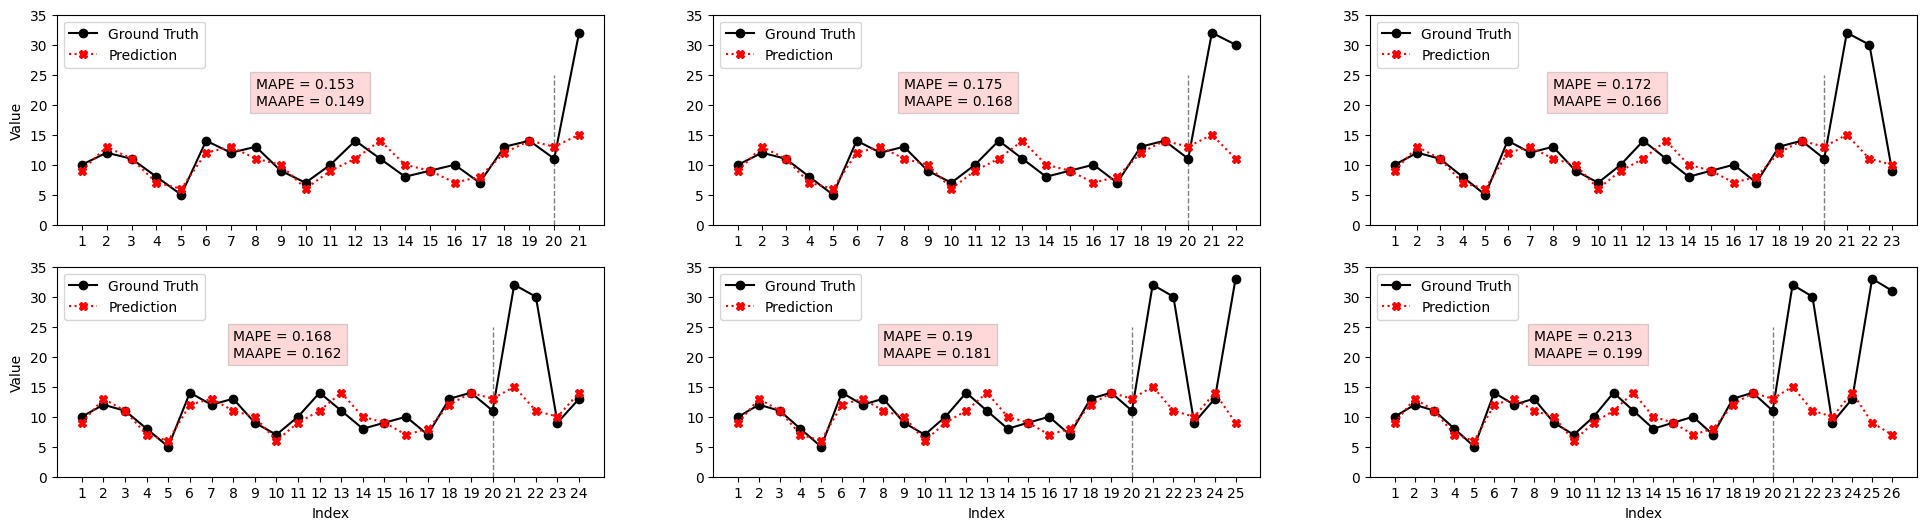

In [6]:
#@markdown 下圖範例中，我們可從中觀察到，MAPE 對於異常值(或離群值)的敏感度較高，當異常值(或離群值)的數量逐漸變多時，MAPE 的變化幅度大於 MAAPE 的變化幅度。

########## Example ##########
plt.figure(figsize=(24, 6))
plt.subplot(231)
y_true = np.array([10, 12, 11, 8, 5, 14, 12, 13, 9, 7,
                   10, 14, 11, 8, 9, 10, 7, 13, 14, 11, 32])
y_pred = np.array([9, 13, 11, 7, 6, 12, 13, 11, 10, 6,
                   9, 11, 14, 10, 9, 7, 8, 12, 14, 13, 15])

mape = mean_absolute_percentage_error(y_true, y_pred)
maape = mean_arctangent_absolute_percentage_error(y_true, y_pred)
plt.vlines(x=20, ymin=0, ymax=25, linestyles='--', color='gray', linewidth=1)
plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1))
plt.ylim([0, 35])
plt.ylabel('Value')

if np.any(y_true == 0):
    text = 'MAPE is undefined.'+'\nMAAPE = '+str(np.round(maape, 3))
else:
    text = 'MAPE = '+str(np.round(mape, 3))+'\nMAAPE = '+str(np.round(maape, 3))

plt.text(8, 20, text, bbox=dict(facecolor='red', alpha=0.15))

plt.subplot(232)
y_true = np.array([10, 12, 11, 8, 5, 14, 12, 13, 9, 7,
                   10, 14, 11, 8, 9, 10, 7, 13, 14, 11, 32, 30])
y_pred = np.array([9, 13, 11, 7, 6, 12, 13, 11, 10, 6,
                   9, 11, 14, 10, 9, 7, 8, 12, 14, 13, 15, 11])

mape = mean_absolute_percentage_error(y_true, y_pred)
maape = mean_arctangent_absolute_percentage_error(y_true, y_pred)
plt.vlines(x=20, ymin=0, ymax=25, linestyles='--', color='gray', linewidth=1)
plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1))
plt.ylim([0, 35])

if np.any(y_true == 0):
    text = 'MAPE is undefined.'+'\nMAAPE = '+str(np.round(maape, 3))
else:
    text = 'MAPE = '+str(np.round(mape, 3))+'\nMAAPE = '+str(np.round(maape, 3))

plt.text(8, 20, text, bbox=dict(facecolor='red', alpha=0.15))

plt.subplot(233)
y_true = np.array([10, 12, 11, 8, 5, 14, 12, 13, 9, 7,
                   10, 14, 11, 8, 9, 10, 7, 13, 14, 11, 32, 30, 9])
y_pred = np.array([9, 13, 11, 7, 6, 12, 13, 11, 10, 6,
                   9, 11, 14, 10, 9, 7, 8, 12, 14, 13, 15, 11, 10])

mape = mean_absolute_percentage_error(y_true, y_pred)
maape = mean_arctangent_absolute_percentage_error(y_true, y_pred)
plt.vlines(x=20, ymin=0, ymax=25, linestyles='--', color='gray', linewidth=1)
plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1))
plt.ylim([0, 35])

if np.any(y_true == 0):
    text = 'MAPE is undefined.'+'\nMAAPE = '+str(np.round(maape, 3))
else:
    text = 'MAPE = '+str(np.round(mape, 3))+'\nMAAPE = '+str(np.round(maape, 3))

plt.text(8, 20, text, bbox=dict(facecolor='red', alpha=0.15))

plt.subplot(234)
y_true = np.array([10, 12, 11, 8, 5, 14, 12, 13, 9, 7,
                   10, 14, 11, 8, 9, 10, 7, 13, 14, 11, 32, 30, 9, 13])
y_pred = np.array([9, 13, 11, 7, 6, 12, 13, 11, 10, 6,
                   9, 11, 14, 10, 9, 7, 8, 12, 14, 13, 15, 11, 10, 14])

mape = mean_absolute_percentage_error(y_true, y_pred)
maape = mean_arctangent_absolute_percentage_error(y_true, y_pred)
plt.vlines(x=20, ymin=0, ymax=25, linestyles='--', color='gray', linewidth=1)
plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1))
plt.ylim([0, 35])
plt.xlabel('Index')
plt.ylabel('Value')

if np.any(y_true == 0):
    text = 'MAPE is undefined.'+'\nMAAPE = '+str(np.round(maape, 3))
else:
    text = 'MAPE = '+str(np.round(mape, 3))+'\nMAAPE = '+str(np.round(maape, 3))

plt.text(8, 20, text, bbox=dict(facecolor='red', alpha=0.15))

plt.subplot(235)
y_true = np.array([10, 12, 11, 8, 5, 14, 12, 13, 9, 7,
                   10, 14, 11, 8, 9, 10, 7, 13, 14, 11, 32, 30, 9, 13, 33])
y_pred = np.array([9, 13, 11, 7, 6, 12, 13, 11, 10, 6,
                   9, 11, 14, 10, 9, 7, 8, 12, 14, 13, 15, 11, 10, 14, 9])

mape = mean_absolute_percentage_error(y_true, y_pred)
maape = mean_arctangent_absolute_percentage_error(y_true, y_pred)
plt.vlines(x=20, ymin=0, ymax=25, linestyles='--', color='gray', linewidth=1)
plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1))
plt.ylim([0, 35])
plt.xlabel('Index')

if np.any(y_true == 0):
    text = 'MAPE is undefined.'+'\nMAAPE = '+str(np.round(maape, 3))
else:
    text = 'MAPE = '+str(np.round(mape, 3))+'\nMAAPE = '+str(np.round(maape, 3))

plt.text(8, 20, text, bbox=dict(facecolor='red', alpha=0.15))

plt.subplot(236)
y_true = np.array([10, 12, 11, 8, 5, 14, 12, 13, 9, 7,
                   10, 14, 11, 8, 9, 10, 7, 13, 14, 11, 32, 30, 9, 13, 33, 31])
y_pred = np.array([9, 13, 11, 7, 6, 12, 13, 11, 10, 6,
                   9, 11, 14, 10, 9, 7, 8, 12, 14, 13, 15, 11, 10, 14, 9, 7])

mape = mean_absolute_percentage_error(y_true, y_pred)
maape = mean_arctangent_absolute_percentage_error(y_true, y_pred)
plt.vlines(x=20, ymin=0, ymax=25, linestyles='--', color='gray', linewidth=1)
plt.plot(range(1, len(y_true)+1), y_true, marker='o', color='black', label='Ground Truth')
plt.plot(range(1, len(y_pred)+1), y_pred, marker='X', color='red', ls=':', label='Prediction')
plt.legend(loc=2)
plt.xticks(range(1, len(y_true)+1))
plt.ylim([0, 35])
plt.xlabel('Index')

if np.any(y_true == 0):
    text = 'MAPE is undefined.'+'\nMAAPE = '+str(np.round(maape, 3))
else:
    text = 'MAPE = '+str(np.round(mape, 3))+'\nMAAPE = '+str(np.round(maape, 3))

plt.text(8, 20, text, bbox=dict(facecolor='red', alpha=0.15))

img_path = 'MAPE_and_MAAPE_with_outliers.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

# Python 範例程式碼

In [7]:
import sys

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Python version:', sys.version[0:7])
print('NumPy version:', np.__version__)
print('Matplotlib version:', mpl.__version__)

Python version: 3.10.12
NumPy version: 1.26.4
Matplotlib version: 3.7.1


In [8]:
def mean_absolute_percentage_error(y_true=None, y_pred=None):
    '''
    計算平均絕對百分比誤差 MAPE。

    params:
        y_true (np.array, pd.series): 實際值
        y_pred (np.array, pd.series): 預測值

    return:
        mape (float): 平均絕對百分比誤差
    '''

    if isinstance(y_true, list) and isinstance(y_pred, list):
        raise TypeError('變數型態須為 NumPy Array 或 Pandas Series')

    y_true = np.array(y_true)
    if np.any(y_true==0):
        epsilon = np.finfo(np.float64).eps
        mape = np.mean(np.abs(y_true-y_pred)/np.maximum(np.abs(y_true), epsilon), axis=0)

    else:
        mape = np.mean(np.abs((y_true-y_pred)/y_true), axis=0)

    return mape

In [9]:
def mean_arctangent_absolute_percentage_error(y_true=None, y_pred=None):
    '''
    計算平均反正切絕對百分比誤差 MAAPE。

    params:
        y_true (np.array, pd.series): 實際值
        y_pred (np.array, pd.series): 預測值

    return:
        maape (float): 平均反正切絕對百分比誤差
    '''

    if isinstance(y_true, list) and isinstance(y_pred, list):
        raise TypeError('變數型態須為 NumPy Array 或 Pandas Series')

    y_true = np.array(y_true)
    if np.any(y_true==0):
        epsilon = np.finfo(np.float64).eps
        maape = np.mean(np.arctan(np.abs(y_true-y_pred)/np.maximum(np.abs(y_true), epsilon)), axis=0)

    else:
        maape = np.mean(np.arctan(np.abs((y_true-y_pred)/y_true)), axis=0)

    return maape

# 參考文獻  

* [What are the shortcomings of the Mean Absolute Percentage Error (MAPE)?](https://stats.stackexchange.com/questions/299712/what-are-the-shortcomings-of-the-mean-absolute-percentage-error-mape/299713#299713) in [Stack Exchange](https://stats.stackexchange.com/).
* Sungil Kim, Heeyoung Kim, A new metric of absolute percentage error for intermittent demand forecasts, Volume 32, Issue 3, 2016, Pages 669-679, ISSN 0169-2070, [https://doi.org/10.1016/j.ijforecast.2015.12.003](https://www.sciencedirect.com/science/article/pii/S0169207016000121)